# **Principal Component Analysis Project**

**Project Summary:**
The goal of this analysis is to successfully reduce the dimensionality of the WGU Telecom dataset. The results of an effective principal component analysis allows for subsequent analysis of the targeted principal components and will assist with further assessment of customer habits which will lead to better, informed decision-making.
<br><br>

**Research Question:**
Can principal component analysis be used to identify important features that contribute to common characteristics of WGU Telecom subscribers?
<br><br>
## **Table of Contents**
1. [Importing Dataset](#import-data)

2. [Preprocessing](#preprocessing)

3. [Principal Component Analysis](#pca)

4. [Results](#results)

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name="import-data"></a>
# Import Dataset
- Rename itemized categical columns to fit description in data dictionary
- Search for dupilcate entries
- Identify any null values
- Explore data types

In [ ]:
# Upload CSV file and create backup
data = pd.read_csv(r'/content/drive/MyDrive/data_files/churn_clean_d212_t2.csv')
data_backup = data.copy(deep = True)

# Rename Item columns to represent their corresponding survey category
data.rename(columns = {'Item1':'Timely_response',
                       'Item2': 'Timely_fixes',
                       'Item3':'Timely_replacements',
                       'Item4':'Reliability',
                       'Item5':'Options',
                       'Item6':'Respectful_response',
                       'Item7':'Courteous_staff',
                       'Item8':'Active_listeners'}, inplace = True)


# View first 3 rows of dataframe
data.head(3)


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_staff,Active_listeners
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3


In [ ]:
# Explore data
# Confirm no duplicate entries for data by checking for unique customer ids

data['Customer_id'].duplicated().value_counts()


False    10000
Name: Customer_id, dtype: int64

In [ ]:
# Search for null values

data.isnull().sum()


CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [ ]:
# Explore data types, identify target variables
# Search df info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

<a name="preprocessing"></a>
# Preprocessing
- Isolate continuous numeric data for principal component analysis
- Remove latitude and longitude from new dataframe
- Scale data using Standard Scaler

In [ ]:
# PCA dataframe creation
# Search for CONTINUOUS numerical data only
t2 = pd.DataFrame(data.select_dtypes(include = 'float64'))

# View new df
t2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB


In [ ]:
# View summary statistics - data to be scaled using standard scaler
t2.describe()


,Lat,Lng,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,39806.926771,10.001848,34.526188,172.624816,3392.341550
std,5.437389,15.156142,28199.916702,2.976019,26.443063,42.943094,2185.294852
min,17.966120,-171.688150,348.670000,0.099747,1.000259,79.978860,155.506715
25%,35.341828,-97.082812,19224.717500,8.018214,7.917694,139.979239,1236.470827
50%,39.395800,-87.918800,33170.605000,10.018560,35.430507,167.484700,3279.536903
75%,42.106908,-80.088745,53246.170000,11.969485,61.479795,200.734725,5586.141370
max,70.640660,-65.667850,258900.700000,21.207230,71.999280,290.160419,7158.981530


In [ ]:
# Create df with only continuous quantitative variables - drop lat and lng
df = t2.drop(columns = ['Lat', 'Lng'])

# View first three rows of new df, confirm drop of lat and lng
df.head(3)

,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,28561.99,7.978323,6.795513,172.455519,904.536110
1,21704.77,11.699080,1.156681,242.632554,800.982766
2,9609.57,10.752800,15.754144,159.947583,2054.706961


In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()

In [ ]:
# Fit scaler to dataset
scaler.fit(df)

StandardScaler()

In [ ]:
# Scale samples to transfrom values
scaled = scaler.transform(df)

In [ ]:
# Export copy of scaled data in a dataframe
df_scaled = pd.DataFrame(scaled, index = df.index, columns = df.columns)


In [ ]:
# Confirm scaled data
scaled_summary_stats = df_scaled.describe()

# Observe mean of 0 and standard deviation  of 1
scaled_summary_stats.round(1)

,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.4,-3.3,-1.3,-2.2,-1.5
25%,-0.7,-0.7,-1.0,-0.8,-1.0
50%,-0.2,0.0,0.0,-0.1,-0.1
75%,0.5,0.7,1.0,0.7,1.0
max,7.8,3.8,1.4,2.7,1.7


<a name="pca"></a>
# Principal Component Analysis
- Instantiate principal compnent analysis
- Fit PCA to data, limited to Top-5 principal compnents

In [ ]:
# Instantiate PCA with all features in df
pca = PCA(n_components = df.shape[1], random_state = 61)

pca.fit(scaled)

PCA(n_components=5, random_state=61)

In [ ]:
# Fit and transform  pca to scaled data - scaled
pc = pca.transform(scaled)

In [ ]:
# Create new df with fit and transformed pc's
df_pc = pd.DataFrame(pc, columns = ['PC_1,', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])

# View first three rows of new pc df
df_pc.head(3)

,"PC_1,",PC_2,PC_3,PC_4,PC_5
0,-1.551056,0.279016,-0.380379,-0.620483,-0.064167
1,-1.662133,-1.703695,0.213964,-0.826325,-0.020960
2,-0.948752,-0.406056,-1.047420,0.085881,0.082959


<a name="results"></a>
# Results
- Identify principal components
- Fit PC's into covariance matrix
- Plot covariance matrix using heatmap
- Calculate eigenvalue
- Vizualize eigenvalues on Scree plot
- Calculate total variance explained by PC's
  - Visualize explained variance using heatmap
  - Scree plot of total explained variance

In [ ]:
# Prepare df for covariance matrix
# Apply fit_transform of scaler to original continuous data df
scaled_continuous = scaler.fit_transform(df)

# Create new df for covariance matrix
df_cov_matrix = pd.DataFrame(scaled_continuous, columns = df.columns)

# View first three rows new covariance matrix df
df_cov_matrix.head(3)

,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.398778,-0.679978,-1.048746,-0.003943,-1.138487
1,-0.641954,0.570331,-1.262001,1.630326,-1.185876
2,-1.070885,0.252347,-0.709940,-0.295225,-0.612138


In [ ]:
# Compute covariance matrix - put into new df
covariance_matrix =  pd.DataFrame.cov(df_cov_matrix)

# View covariance matrix
covariance_matrix

,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
Income,1.000100,-0.010012,0.002115,-0.003014,0.003674
Outage_sec_perweek,-0.010012,1.000100,0.002932,0.020498,0.004176
Tenure,0.002115,0.002932,1.000100,-0.003337,0.991594
MonthlyCharge,-0.003014,0.020498,-0.003337,1.000100,0.060412
Bandwidth_GB_Year,0.003674,0.004176,0.991594,0.060412,1.000100


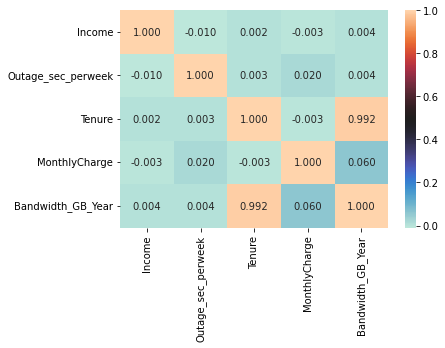

In [ ]:
# Show heatmap of covariance matrix
sns.heatmap(covariance_matrix, annot = True, cmap = 'icefire', fmt = '.3f');

In [ ]:
# Eigenvalues
# Calculate Eigenvalues
eigenvalues = pca.explained_variance_

# Create df with eigenvalues and pc's
df_eigenvalues = pd.DataFrame(eigenvalues.round(3), columns = ['Eigenvalue per PC'], index = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])

# View eigenvalue df
df_eigenvalues

,Eigenvalue per PC
PC_1,1.993
PC_2,1.024
PC_3,0.998
PC_4,0.979
PC_5,0.006


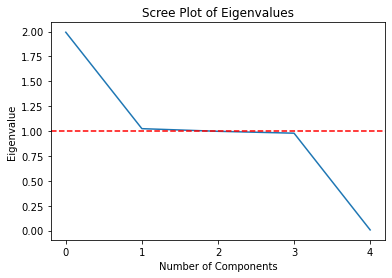

In [ ]:
# Scree Plot
plt.plot(eigenvalues)
plt.title("Scree Plot of Eigenvalues")
plt.xlabel("Number of Components")
plt.ylabel("Eigenvalue")
plt.axhline(y = 1, color = 'red', linestyle = '--')
plt.xticks(range(0, 5))
plt.show()

In [ ]:
# Create loadings df
loadings = pd.DataFrame(pca.components_.T, columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'], index = df.columns)

# View principal component loadings
loadings

,PC_1,PC_2,PC_3,PC_4,PC_5
Income,0.003936,0.365683,0.897256,0.247368,-0.001250
Outage_sec_perweek,0.005858,-0.682929,0.078077,0.726276,0.000034
Tenure,0.705844,0.039973,-0.030063,0.035159,-0.705724
MonthlyCharge,0.040748,-0.631099,0.433512,-0.640363,-0.045361
Bandwidth_GB_Year,0.707159,0.000089,-0.000613,-0.005588,0.707032


In [ ]:
# Explained variance confirmation
print("Variance Explained by all PC's = ", round(sum((pca.explained_variance_ratio_ * 100))))

Variance Explained by all PC's =  100


In [ ]:
# Captured variance per PC
explained_variance = pca.explained_variance_ratio_ * 100

# Create explained variance df
df_explained_variance = pd.DataFrame(explained_variance.round(2), columns = ['Percent Variance Explained per PC'], index = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])

# View explained variance df
df_explained_variance

,Percent Variance Explained per PC
PC_1,39.86
PC_2,20.48
PC_3,19.95
PC_4,19.57
PC_5,0.13


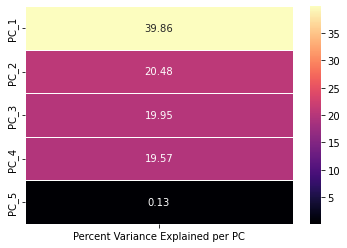

In [ ]:
# Heatmap of variances
sns.heatmap(df_explained_variance, annot = True, linewidths = 1, fmt = '.2f', cmap = 'magma');

In [ ]:
# Total variance captured by PC_1 and PC_2
# Sum values of PC_1 + PC_2
39.86+20.48

60.34

In [ ]:
# Cumulative sum of variance covered in terms of percentage
pct_sum = np.cumsum(pca.explained_variance_ratio_ * 100)

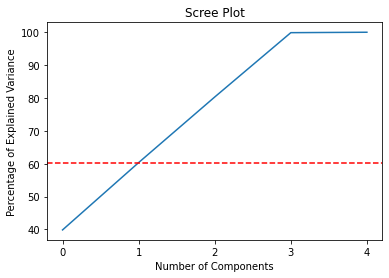

In [ ]:
# Scree Plot
plt.plot(pct_sum)
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Percentage of Explained Variance")
plt.axhline(y = 60.34, color = 'red', linestyle = '--')
plt.xticks(range(0, 5))
plt.show()